# Линейная регрессия

In [69]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [70]:
dataset = pd.read_csv('datasets/auto_insurance_sweden.csv', names=['X', 'Y'])
data = np.array(dataset.X)
if len(data.shape) == 1:
    data = np.array([[item] for item in data])
target = np.array(dataset.Y)
target = np.array([[item] for item in target])

In [71]:
f1 = np.linalg.inv(data.T @ data)
res = f1 @ data.T @ target

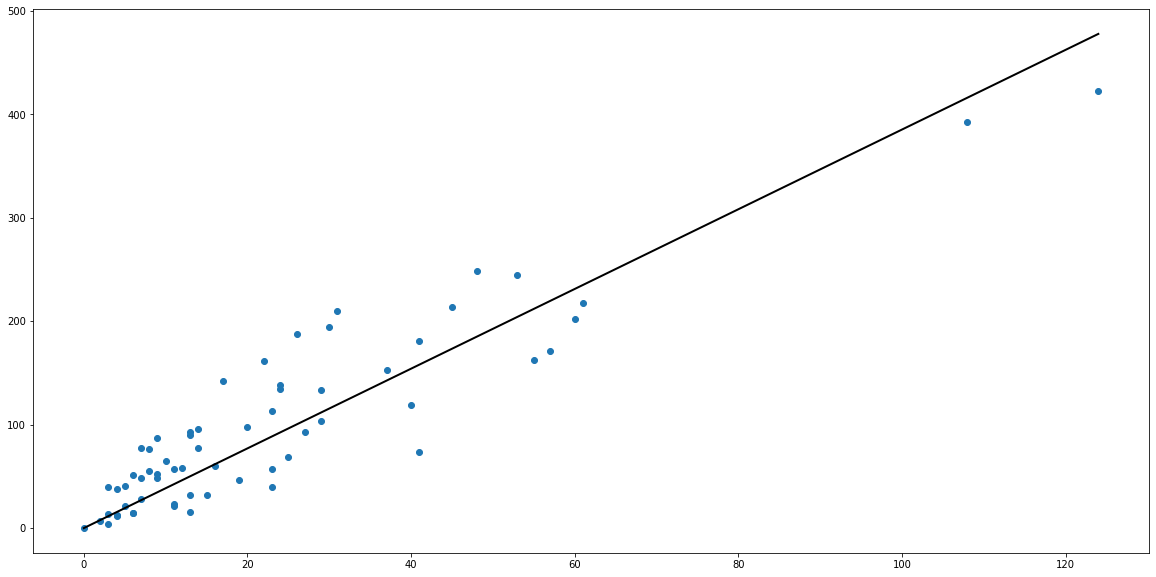

In [72]:
a = 1
b = res[0]
x = [0, max(data)]
y = [0, b*max(data)+a]

fig, ax = plt.subplots(figsize=(20, 10))

ax.scatter(data, target)
ax.plot(x, y, color='black', linewidth=2)

plt.show()